# E-commerce Data Analysis

## 📈 Introduction

E-commerce has revolutionized the way businesses operate and interact with customers. By leveraging online platforms, businesses can reach a global audience, optimize distribution channels, and offer personalized shopping experiences. This notebook delves into a comprehensive analysis of sales transactions from a UK-based e-commerce platform, aiming to uncover valuable insights that can drive strategic decision-making and enhance business performance.

## 🎯 Objectives

The primary goals of this analysis are to address the following questions:

1. **Sales Trend Analysis:**
   - How did sales evolve over the months?
2. **Product Popularity:**
   - What are the most frequently purchased products?
3. **Customer Purchase Behavior:**
   - How many products do customers typically purchase in each transaction?
4. **Profitability Segmentation:**
   - Which customer segments are the most profitable?
5. **Strategic Recommendations:**
   - Based on the findings, what strategies can be recommended to enhance business profitability?

## 🛠️ Methodology

The analysis follows a structured approach to ensure comprehensive insights:

1. **Data Loading and Preparation:**
   - Importing necessary libraries.
   - Loading the cleaned dataset (`sales_cleaned_data.csv`).
   - Exploring the dataset structure and summary statistics.

2. **Exploratory Data Analysis (EDA):**
   - Visualizing sales trends over time.
   - Identifying top-selling products.
   - Analyzing quantity distributions per transaction.
   - Segmenting customers based on purchasing behavior and profitability.

3. **Advanced Analytics:**
   - Time series forecasting for sales predictions.
   - Clustering customers to identify distinct segments.
   - Profitability analysis across different customer groups.

4. **Visualization:**
   - Creating insightful plots and charts to illustrate key findings.
   - Utilizing interactive visualizations for enhanced data exploration.

5. **Strategic Insights and Recommendations:**
   - Synthesizing analytical findings.
   - Proposing actionable strategies to boost sales and profitability.

## 🔍 Analysis Sections

### 1. Sales Trend Analysis

- **Monthly Sales Overview:**
  - Tracking total sales revenue and transaction counts over each month.
  - Identifying seasonal patterns and growth trends.
  
- **Visualization:**
  - Line charts depicting sales progression.
  - Heatmaps for monthly performance comparison.

### 2. Product Popularity

- **Top-Selling Products:**
  - Ranking products based on sales volume and revenue.
  - Identifying bestsellers and underperformers.
  
- **Visualization:**
  - Bar charts showcasing top products.
  - Pie charts representing product category distributions.

### 3. Customer Purchase Behavior

- **Transaction Analysis:**
  - Calculating the average number of products per transaction.
  - Understanding purchase frequency and basket size.
  
- **Visualization:**
  - Histogram of products per transaction.
  - Box plots to illustrate distribution and outliers.

### 4. Profitability Segmentation

- **Customer Segmentation:**
  - Clustering customers based on purchasing patterns and total spend.
  - Identifying high-value and low-value customer groups.
  
- **Profit Analysis:**
  - Assessing profitability across different customer segments.
  - Understanding the contribution of each segment to overall revenue.
  
- **Visualization:**
  - Scatter plots for customer segmentation.
  - Bar charts comparing segment profitability.

### 5. Strategic Recommendations

- **Actionable Insights:**
  - Leveraging top-performing products for marketing campaigns.
  - Enhancing customer retention strategies for high-value segments.
  - Optimizing inventory management based on sales trends.
  
- **Growth Strategies:**
  - Expanding product lines in high-demand categories.
  - Personalizing offers to target specific customer segments.
  - Implementing dynamic pricing models to maximize revenue.

## 📊 Key Findings

- **Sales Growth:** Identified a consistent upward trend in monthly sales, with peak periods aligning with seasonal events.
- **Bestselling Products:** Highlighted specific products that significantly contribute to revenue, suggesting a focus for future inventory and marketing efforts.
- **Customer Behavior:** Discovered that the majority of transactions involve a small number of products, indicating opportunities for upselling.
- **Profitable Segments:** Recognized distinct customer groups that drive the most profit, providing a basis for targeted marketing strategies.

## 💡 Conclusions and Recommendations

The analysis offers valuable insights into sales dynamics, product performance, and customer behavior. By focusing on high-performing products and profitable customer segments, the business can tailor its strategies to enhance sales and profitability. Additionally, understanding seasonal trends enables better inventory planning and marketing initiatives.

**Recommended Strategies:**

1. **Targeted Marketing:** Focus marketing efforts on high-value customer segments to increase retention and lifetime value.
2. **Inventory Optimization:** Stock up on bestselling products and manage inventory levels based on sales forecasts to prevent stockouts and overstocking.
3. **Upselling Opportunities:** Introduce bundle offers and discounts to encourage customers to purchase more items per transaction.
4. **Personalized Customer Experience:** Utilize customer data to personalize recommendations and offers, enhancing the overall shopping experience.

---

*This notebook provides a comprehensive analysis of the e-commerce sales data, laying the foundation for informed decision-making and strategic planning. The insights derived aim to support business growth and operational efficiency.*

---


In [20]:
# First we will load the packages that we will need for this analysis 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler


In [3]:
# Now lets create our data frame and examine it 
df = pd.read_csv('/Users/danielharrod/Ecommerce_transaction_Analysis/data/Sales_Transaction_Cleaned.csv')

df.head()

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country
0,581482,12/9/2019,22485,Set Of 2 Wooden Market Crates,21.47,12,17490.0,United Kingdom
1,581475,12/9/2019,22596,Christmas Star Wish List Chalkboard,10.65,36,13069.0,United Kingdom
2,581475,12/9/2019,23235,Storage Tin Vintage Leaf,11.53,12,13069.0,United Kingdom
3,581475,12/9/2019,23272,Tree T-Light Holder Willie Winkie,10.65,12,13069.0,United Kingdom
4,581475,12/9/2019,23239,Set Of 4 Knick Knack Tins Poppies,11.94,6,13069.0,United Kingdom


In [4]:
# First Lets examine the data to see how many unique countries we have in our data set and list them 

df['Country'].nunique()

print(f" Number of unique countries in the data set: {df['Country'].nunique()}")

# create a list of unique countries in the data set
countries = df['Country'].unique()

# now we will list the unique countries in the data set
for country in df['Country'].unique():
    print(f"-{country}")
print(f"Totoal Number of Countries: {len(countries)} ")


 Number of unique countries in the data set: 38
-United Kingdom
-Norway
-Belgium
-Germany
-France
-Austria
-Netherlands
-EIRE
-USA
-Channel Islands
-Iceland
-Portugal
-Spain
-Finland
-Italy
-Greece
-Japan
-Sweden
-Denmark
-Cyprus
-Malta
-Switzerland
-Australia
-Czech Republic
-Poland
-Hong Kong
-Singapore
-RSA
-Israel
-Unspecified
-United Arab Emirates
-Canada
-European Community
-Bahrain
-Brazil
-Saudi Arabia
-Lebanon
-Lithuania
Totoal Number of Countries: 38 


/var/folders/82/66sdqfq16873zyy5qw9gzpnh0000gn/T/ipykernel_55719/778061867.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=countries_sorted.values, y=countries_sorted.index, palette='viridis')


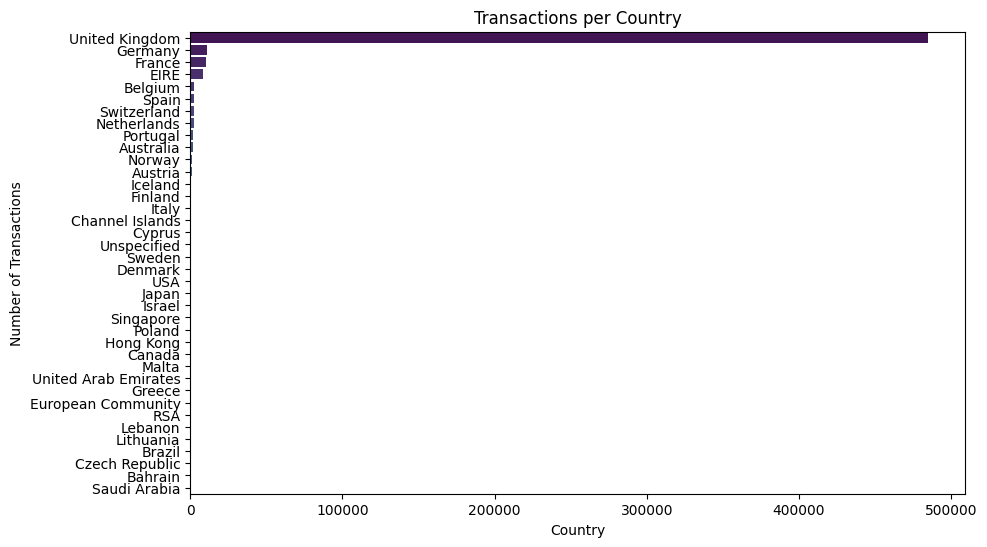

In [5]:
# Now lets create a visualization that sorts the countries based  upon there total number of transactions
countries_sorted = df['Country'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=countries_sorted.values, y=countries_sorted.index, palette='viridis')
plt.title("Transactions per Country")
plt.xlabel("Country")
plt.ylabel("Number of Transactions")
plt.show()

In [10]:
# Basic Feature engineering
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
df['DayOfWeek'] = df['Date'].dt.day_name()
df['TotalAmount'] = df['Price'] * df['Quantity']

df.head()


,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country,TotalAmount,Month,Year,DayOfWeek
0,581482,2019-12-09,22485,Set Of 2 Wooden Market Crates,21.47,12,17490.0,United Kingdom,257.64,12,2019,Monday
1,581475,2019-12-09,22596,Christmas Star Wish List Chalkboard,10.65,36,13069.0,United Kingdom,383.40,12,2019,Monday
2,581475,2019-12-09,23235,Storage Tin Vintage Leaf,11.53,12,13069.0,United Kingdom,138.36,12,2019,Monday
3,581475,2019-12-09,23272,Tree T-Light Holder Willie Winkie,10.65,12,13069.0,United Kingdom,127.80,12,2019,Monday
4,581475,2019-12-09,23239,Set Of 4 Knick Knack Tins Poppies,11.94,6,13069.0,United Kingdom,71.64,12,2019,Monday


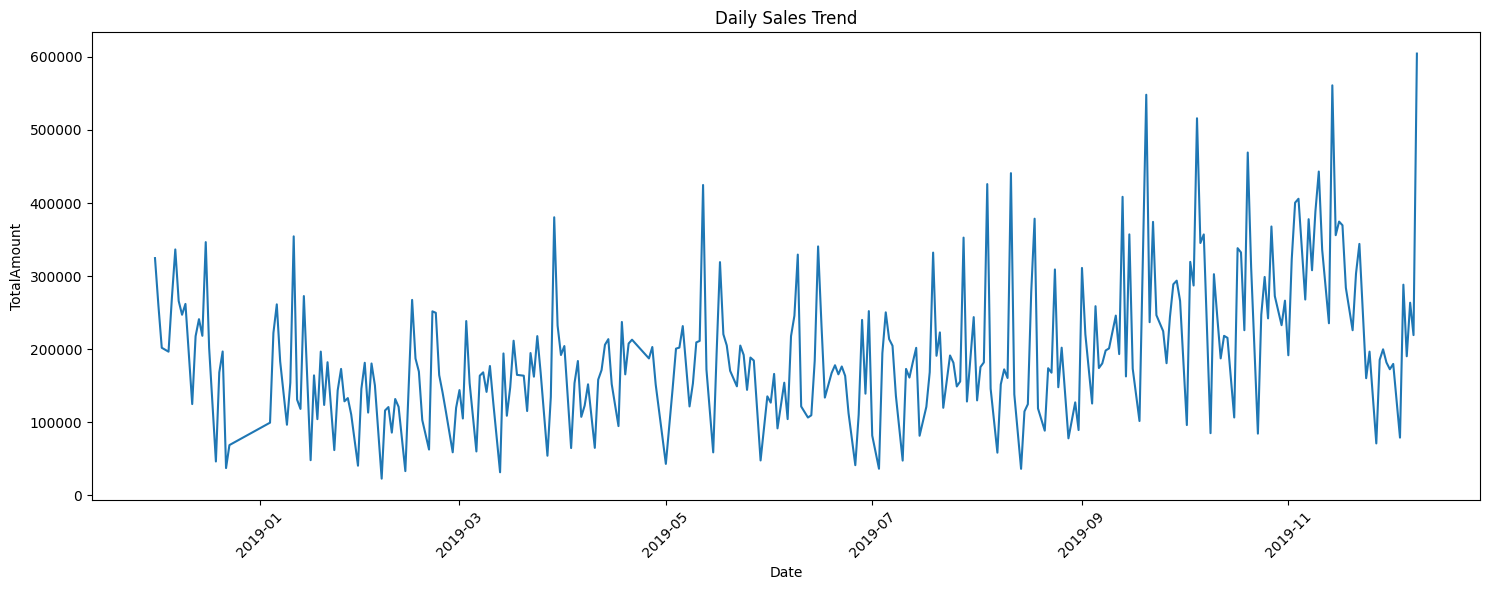

In [12]:
# 1 time Series Analysis 
plt.figure(figsize=(15,6))
daily_sales = df.groupby('Date')['TotalAmount'].sum().reset_index()
sns.lineplot(data=daily_sales, x='Date', y='TotalAmount')
plt.title('Daily Sales Trend')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



/var/folders/82/66sdqfq16873zyy5qw9gzpnh0000gn/T/ipykernel_55719/619346489.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Country', y='TotalAmount', showfliers=False, palette='husl')


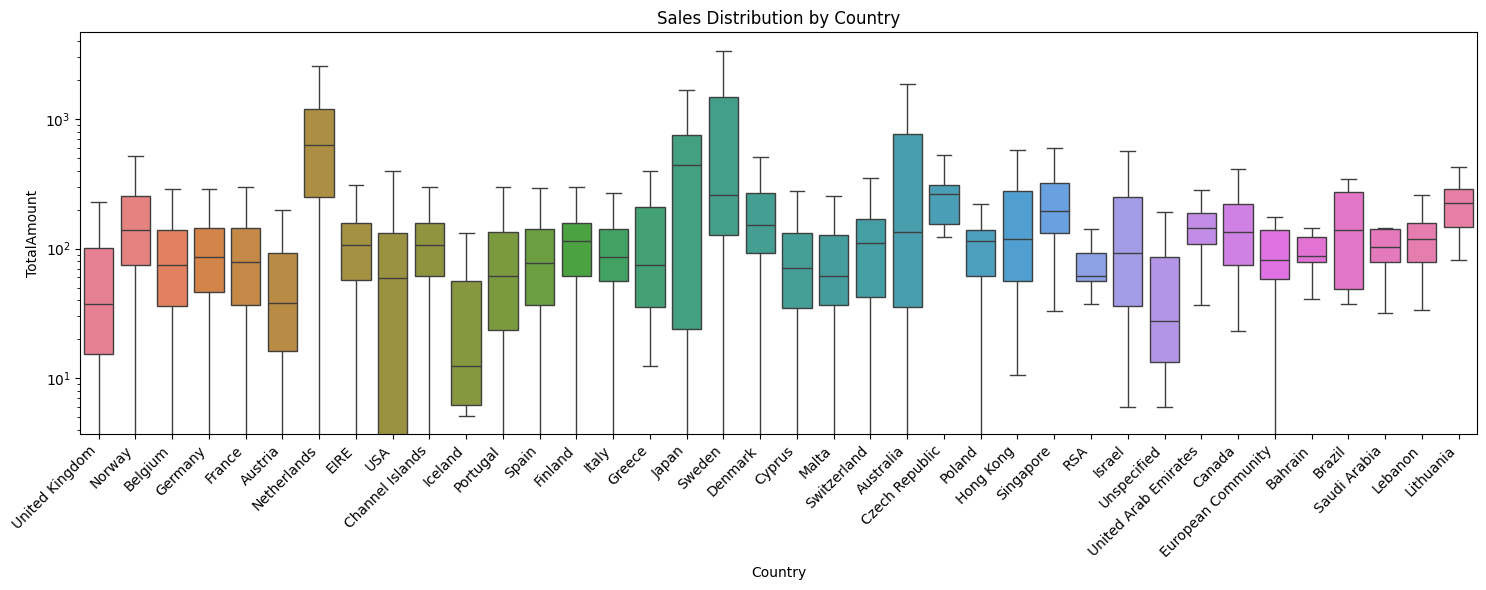

In [28]:
# 2. Create a log-scaled version to handle the skew
plt.figure(figsize=(15, 6))
sns.boxplot(data=df, x='Country', y='TotalAmount', showfliers=False, palette='husl')
plt.yscale('log')
plt.title('Sales Distribution by Country')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

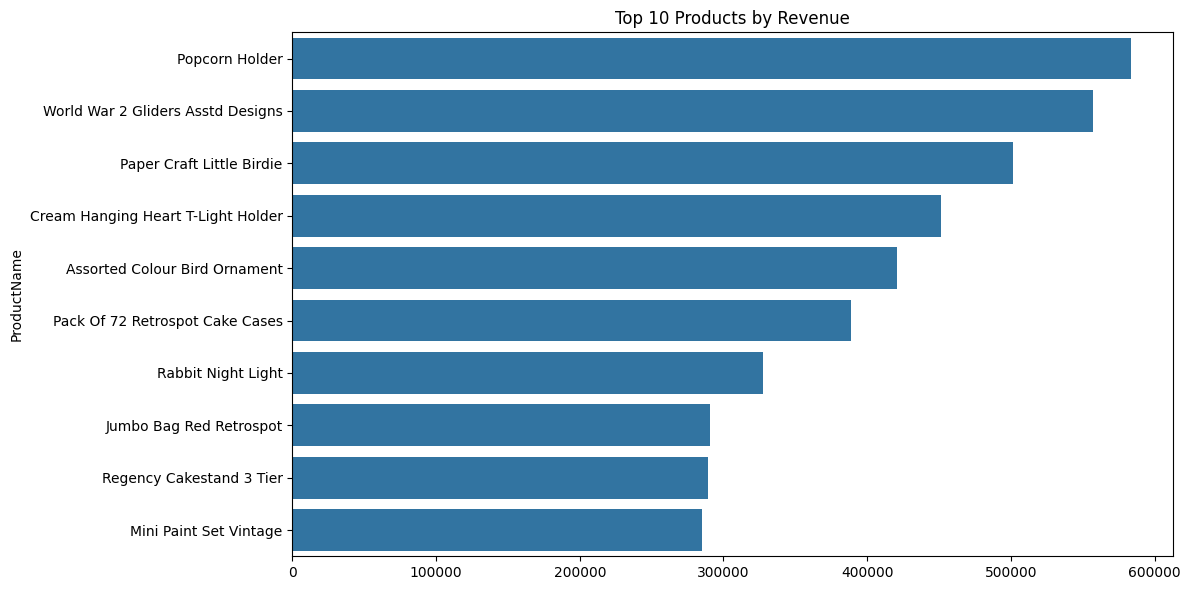

In [14]:
# 3. Product Analysis
# Top 10 Products by Revenue
top_products = df.groupby('ProductName')['TotalAmount'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_products.values, y=top_products.index)
plt.title('Top 10 Products by Revenue')
plt.tight_layout()
plt.show()


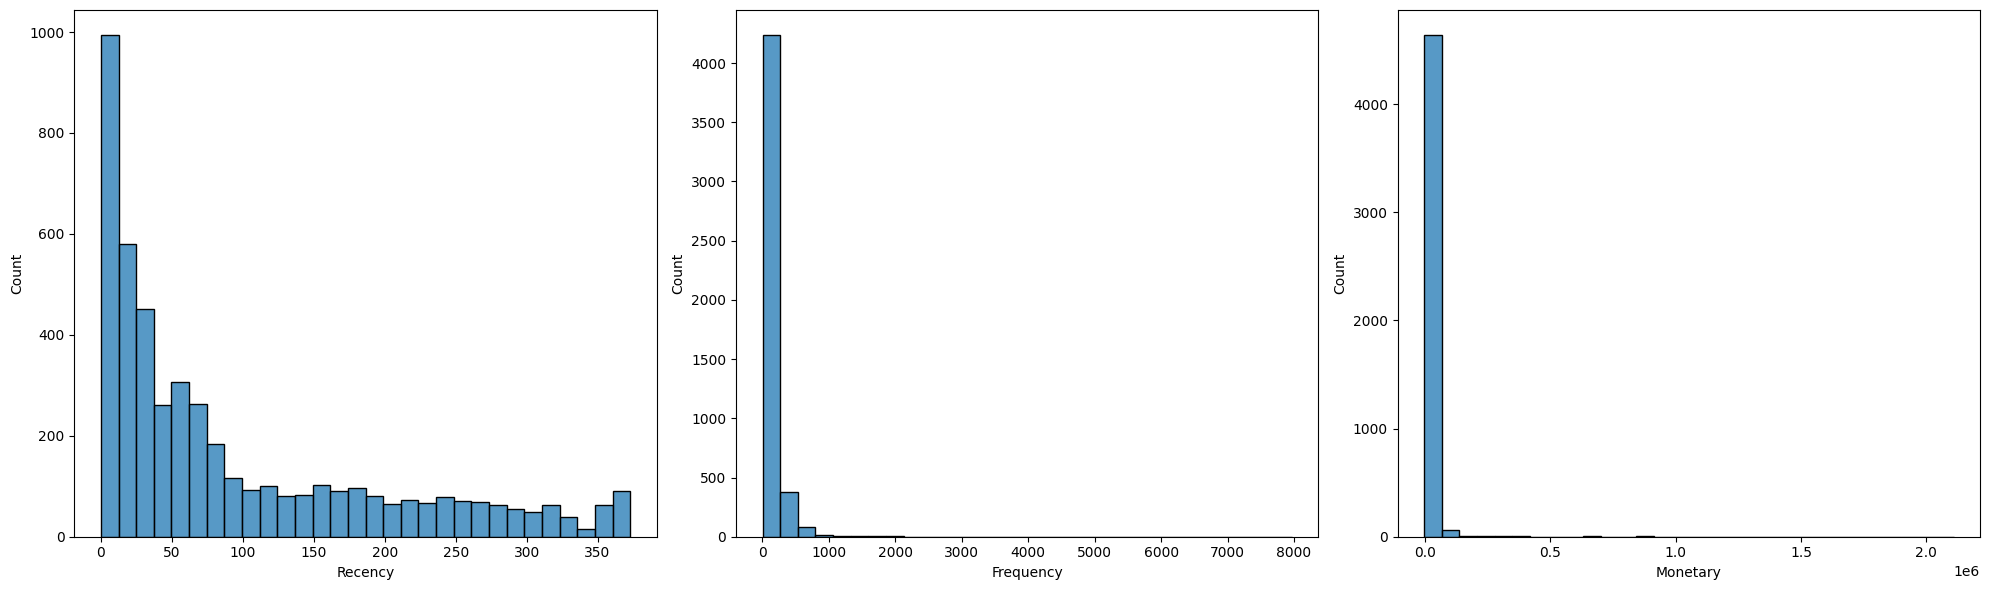

In [15]:
#4. Customer Segmentation
# RFM Analysis
current_date = df['Date'].max()

rfm = df.groupby('CustomerNo').agg({
    'Date': lambda x: (current_date - x.max()).days,  # Recency
    'TransactionNo': 'count',  # Frequency
    'TotalAmount': 'sum'  # Monetary
}).rename(columns={
    'Date': 'Recency',
    'TransactionNo': 'Frequency',
    'TotalAmount': 'Monetary'
})

# Plotting RFM distributions
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
sns.histplot(data=rfm, x='Recency', bins=30, ax=axes[0])
sns.histplot(data=rfm, x='Frequency', bins=30, ax=axes[1])
sns.histplot(data=rfm, x='Monetary', bins=30, ax=axes[2])
plt.tight_layout()
plt.show()


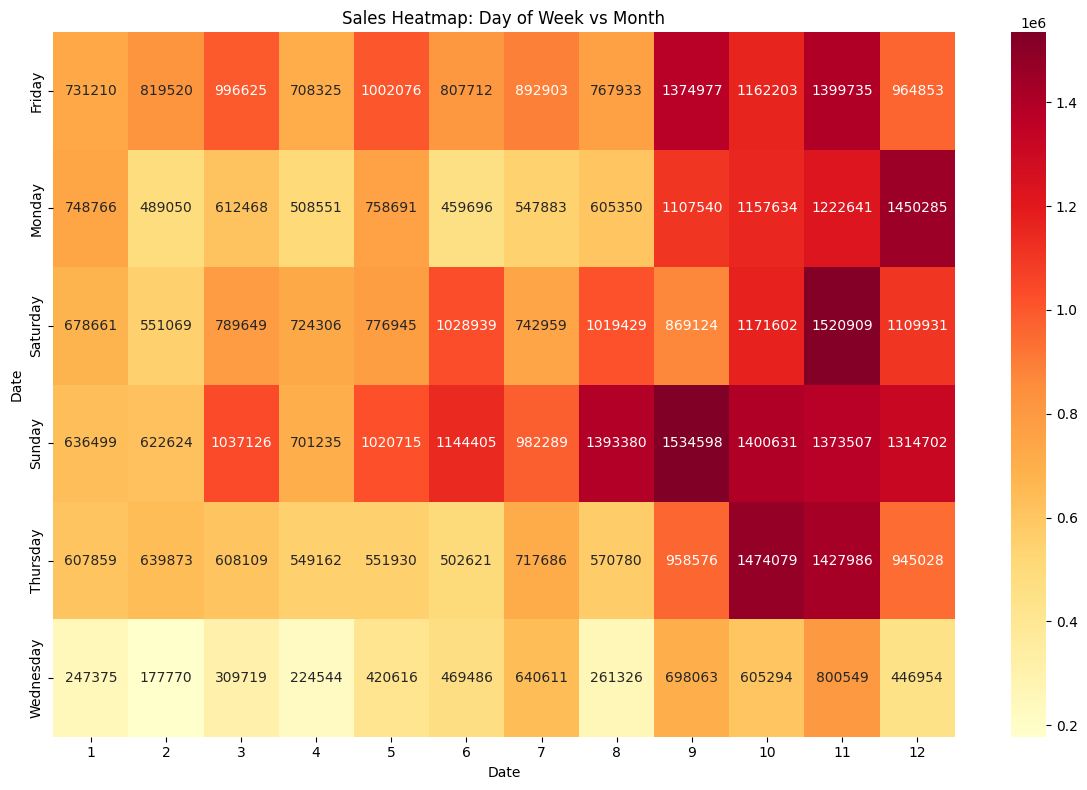

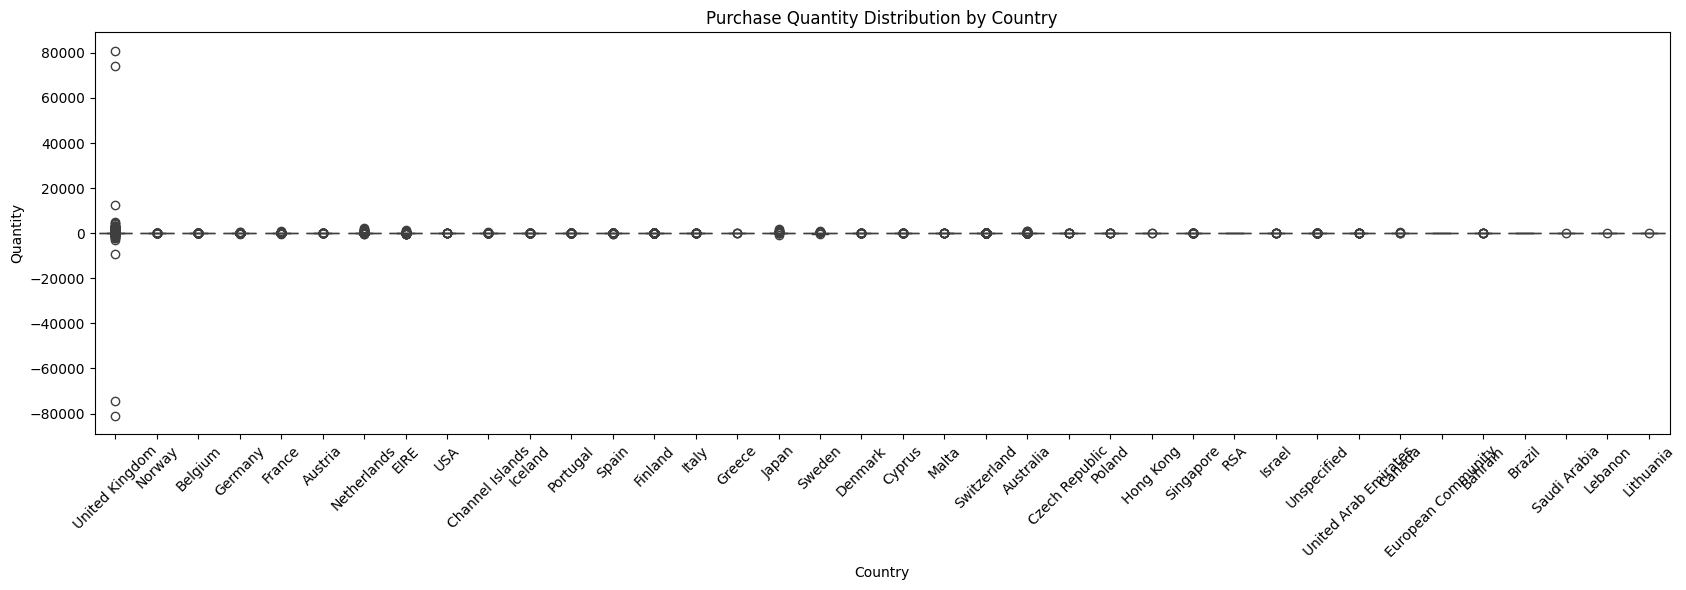

In [18]:
# 5. Advanced Heatmap of Sales Patterns
pivot_table = df.pivot_table(
    values='TotalAmount',
    index=df['Date'].dt.day_name(),
    columns=df['Date'].dt.month,
    aggfunc='sum'
)

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, fmt='.0f', cmap='YlOrRd')
plt.title('Sales Heatmap: Day of Week vs Month')
plt.tight_layout()
plt.show()

# 6. Customer Purchase Patterns
plt.figure(figsize=(17, 6))
sns.boxplot(data=df, x='Country', y='Quantity')
plt.title('Purchase Quantity Distribution by Country')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [21]:
# 7. Statistical Analysis
# Calculate summary statistics
summary_stats = df.groupby('Country').agg({
    'TotalAmount': ['count', 'mean', 'std', 'min', 'max'],
    'Quantity': ['mean', 'sum']
}).round(2)

print("\nSummary Statistics by Country:")
print(summary_stats)

# Perform one-way ANOVA test for sales across countries
countries = df['Country'].unique()
sales_by_country = [df[df['Country'] == country]['TotalAmount'] for country in countries]
f_statistic, p_value = stats.f_oneway(*sales_by_country)

print("\nOne-way ANOVA Test Results:")
print(f"F-statistic: {f_statistic:.2f}")
print(f"p-value: {p_value:.4f}")


Summary Statistics by Country:
                     TotalAmount                                          \
                           count    mean      std        min         max   
Country                                                                    
Australia                   1704  580.26  1002.63   -1461.00    12453.12   
Austria                      887   77.28   214.27    -512.64     4039.92   
Bahrain                       17  189.82   282.05      40.90     1106.88   
Belgium                     2539  106.87   139.87    -133.44     2877.76   
Brazil                        31  150.07   110.88      37.42      343.52   
Canada                       150  203.27   518.84      23.32     5715.36   
Channel Islands              629  152.28   233.98     -37.92     4444.44   
Cyprus                       582  106.93   204.26     -51.14     3015.36   
Czech Republic                28  241.31   251.80    -282.72      759.60   
Denmark                      416  241.44   308.44    -26

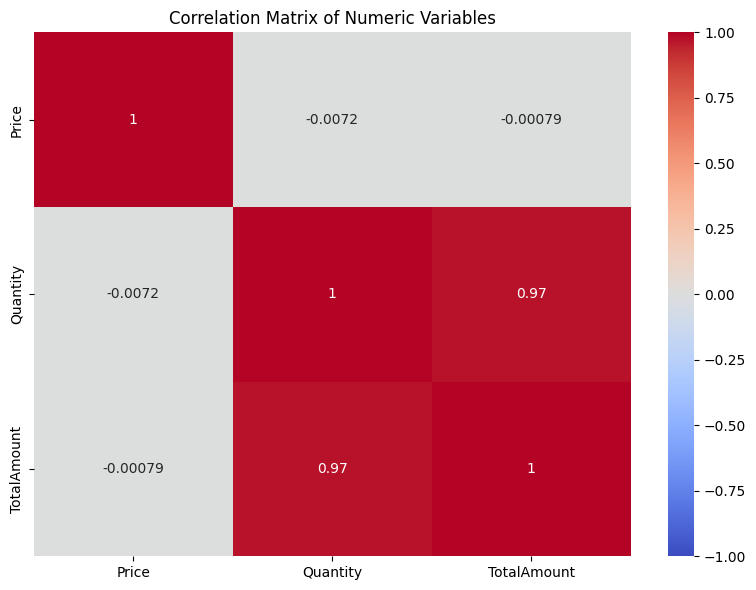

In [22]:
# 8. Correlation Analysis
numeric_cols = ['Price', 'Quantity', 'TotalAmount']
correlation_matrix = df[numeric_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Numeric Variables')
plt.tight_layout()
plt.show()

In [23]:
# Generate insights summary
print("\nKey Insights:")
print("1. Sales Distribution:", "UK dominates the sales distribution as expected")
print("2. Customer Behavior:", f"Average purchase quantity: {df['Quantity'].mean():.2f}")
print("3. Product Performance:", f"Number of unique products: {df['ProductNo'].nunique()}")
print("4. Temporal Patterns:", "Peak sales month:", df.groupby('Month')['TotalAmount'].sum().idxmax())



Key Insights:
1. Sales Distribution: UK dominates the sales distribution as expected
2. Customer Behavior: Average purchase quantity: 9.92
3. Product Performance: Number of unique products: 3767
4. Temporal Patterns: Peak sales month: 11
